In [1]:
%matplotlib inline

from glob import glob
import json
from typing import List

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.pylabtools import figsize

In [2]:
import warnings
warnings.filterwarnings("ignore")

figsize(15, 9)
figsize(15, 9)

sns.__version__

'0.11.2'

In [3]:
result_files = glob("./results/*.json")

rows = []
for rf in result_files:
    with open(rf, "r") as istream:
        stats = json.load(istream)

    for name, history in stats.items():
        for g in history:
            if g <= 6:
                rows.append({"guesses": g, "strategy": name})

df = pd.DataFrame(rows)

counts = df.assign(count=1).groupby("guesses")[["count"]].sum()
max_count = counts["count"].max()

print(f"Max count = {max_count}")

df.head()

Max count = 79


,guesses,strategy
0,4,StrategyFilterOnFeedback
1,6,StrategyFilterOnFeedback
2,5,StrategyFilterOnFeedback
3,2,StrategyFilterOnFeedback
4,6,StrategyFilterOnFeedback


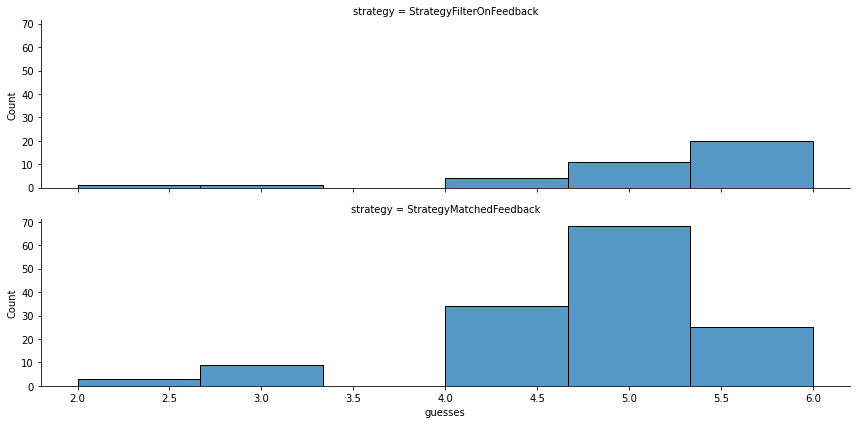

In [16]:
ignored_strategies = [
#     'StrategyRandomWithReplacement',
#     'StrategyRandomWithoutReplacement',
#     'StrategyFilterOnFeedback',
#     'StrategyMatchedFeedback',
]

strategies = [s for s in df['strategy'].unique() if s not in ignored_strategies]
n_plots = len(strategies)
g = sns.FacetGrid(
    df,
    row="strategy",
    aspect=4,
)
g.map(sns.histplot, 'guesses', bins=6, stat='count')
plt.show()